In [4]:
!pip install mne numpy scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import mne

meditation_file = '/content/tan_meditation_trial1.fif'
mind_wandering_file = '/content/tan_mindwandering_trial1.fif'

meditation_raw = mne.io.read_raw_fif(meditation_file, preload=True)
mind_wandering_raw = mne.io.read_raw_fif(mind_wandering_file, preload=True)

Opening raw data file /content/tan_meditation_trial1.fif...
    Range : 0 ... 86316 =      0.000 ...   345.264 secs
Ready.
Reading 0 ... 86316  =      0.000 ...   345.264 secs...
Opening raw data file /content/tan_mindwandering_trial1.fif...
    Range : 0 ... 84308 =      0.000 ...   337.232 secs
Ready.
Reading 0 ... 84308  =      0.000 ...   337.232 secs...


<ipython-input-11-9a6918c56e7c>:6: RuntimeWarning: This filename (/content/tan_meditation_trial1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  meditation_raw = mne.io.read_raw_fif(meditation_file, preload=True)
<ipython-input-11-9a6918c56e7c>:7: RuntimeWarning: This filename (/content/tan_mindwandering_trial1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mind_wandering_raw = mne.io.read_raw_fif(mind_wandering_file, preload=True)


In [12]:
meditation_raw_filtered = meditation_raw.filter(1, 30)
mind_wandering_raw_filtered = mind_wandering_raw.filter(1, 30)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


In [13]:
tmin, tmax = 0, 60  # Define the time range for epochs (1-minute epochs)
n_epochs = 5  # Number of epochs for each condition


In [14]:
import numpy as np

def create_epochs(raw_data, tmin, tmax, n_epochs):
    sfreq = raw_data.info['sfreq']
    events = np.zeros((n_epochs, 3), dtype=int)
    events[:, 0] = np.arange(0, n_epochs) * sfreq * (tmax - tmin)
    events[:, 2] = 1
    return mne.Epochs(raw_data, events, tmin=tmin, tmax=tmax, baseline=None, preload=True)

meditation_epochs = create_epochs(meditation_raw_filtered, tmin, tmax, n_epochs)
mind_wandering_epochs = create_epochs(mind_wandering_raw_filtered, tmin, tmax, n_epochs)


Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5 events and 15001 original time points ...
0 bad epochs dropped


In [15]:
meditation_evoked = meditation_epochs.average()
mind_wandering_evoked = mind_wandering_epochs.average()


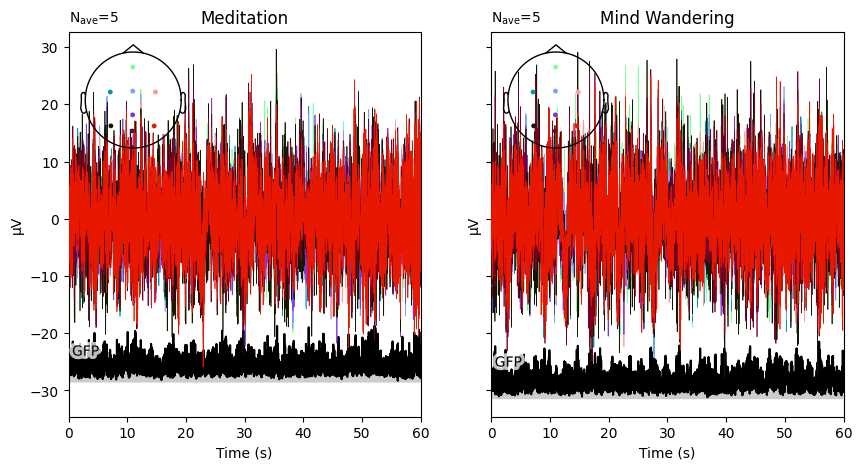

In [17]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one for each condition)
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot the meditation condition
meditation_evoked.plot(axes=axs[0], spatial_colors=True, gfp=True, show=False, time_unit='s')
axs[0].set_title('Meditation')

# Plot the mind-wandering condition
mind_wandering_evoked.plot(axes=axs[1], spatial_colors=True, gfp=True, show=False, time_unit='s')
axs[1].set_title('Mind Wandering')

# Display the plot
plt.show()

